In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [47]:
def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

In [2]:
#Declination of the sun, counted from Spring equinox
def sundec(day):
    return np.arcsin(np.sin(23.44/180*math.pi)*np.sin(day/365.24*2*math.pi))

def sundecdeg(day):
    return 180/math.pi*sundec(day)

#More accurate computation
def sundeq(day):
    dph = 3 #perihelion on Jan 3 (Jan 5, 2, 4, 4, 3, 4, 3, 3, 5, 2 in 2020, 2021, ...)
    w=2*math.pi/365.24
#    a=day*w+math.pi/2
    a=(day+89)*w
    b=a+2*0.0167*np.sin(w*(day+79-dph)) #solar ecliptic longitude counted from Winter solstice
    return -np.arcsin(np.sin(23.44/180*math.pi)*np.cos(b))

In [3]:
#Equation of time, counted from Spring equinox
def eqot(day):
    dph = 3 #perihelion on Jan 3 (Jan 5, 2, 4, 4, 3, 4, 3, 3, 5, 2 in 2020, 2021, ...)
    w=2*math.pi/365.24
#    a=day*w+math.pi/2
    a=(day+89)*w
    b=a+2*0.0167*np.sin(w*(day+79-dph)) #solar ecliptic longitude counted from Winter solstice
#    c=(a+np.arctan2(np.cos(b),np.cos(23.44/180*math.pi)*np.sin(b)))/math.pi+.5
    c=(a-np.arctan(np.tan(b)/np.cos(23.44/180*math.pi)))/math.pi
    return 12*(c-np.round(c))

#counting from Jan 1
def eqot1(d): #d=0 on Jan 1
    return eqot(d-79)

#counting from Jan 1
def eqot2(d): #d=0 on Jan 1
    dph = 3 #perihelion on Jan 3 (Jan 5, 2, 4, 4, 3, 4, 3, 3, 5, 2 in 2020, 2021, ...)
    w=2*math.pi/365.24
    a=(d+10)*w #counting from Winter solstice 
    b=a+2*0.0167*np.sin(w*(d+1-dph)) #solar ecliptic longitude counted from Winter solstice
    c=(a-np.arctan(np.tan(b)/np.cos(23.44/180*math.pi)))/math.pi
    return 12*(c-np.round(c))

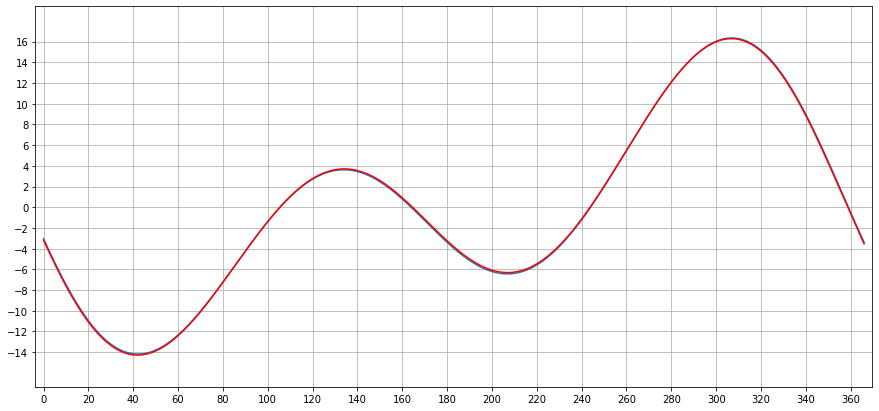

In [4]:
#Equation of time
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi

x = np.linspace(0, 366, 500)
fig = plt.figure(figsize=(15,7))
ax = fig.gca()
plt.plot(x,60*eqot1(x))
plt.plot(x,60*eqot2(x),'r')
plt.margins(.01,.1)
#ax.set_xlim([-1,3])
#ax.set_ylim([-15,18])
ax.set_xticks(np.arange(0, 365, 20))
ax.set_yticks(np.arange(-14, 16.1, 2))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.legend(loc=2)
#plt.savefig('scaphe.pdf',bbox_inches='tight')
plt.show()

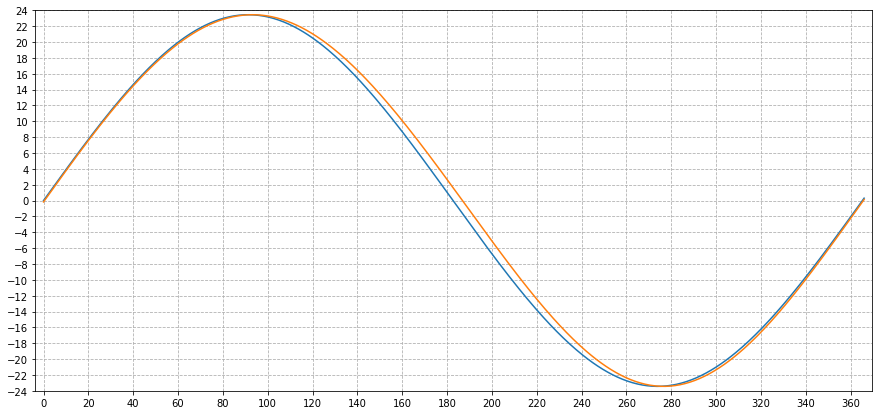

In [5]:
#Declination curve for (unit) spherical sundial
x = np.linspace(0, 366, 500)
fig = plt.figure(figsize=(15,7))
ax = fig.gca()
plt.plot(x,sundecdeg(x))
plt.plot(x,180/math.pi*sundeq(x))
plt.margins(.01,.1)
#ax.set_xlim([-1,3])
ax.set_ylim([-1,10])
ax.set_xticks(np.arange(0, 365, 20))
ax.set_yticks(np.arange(-24, 25, 2))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.legend(loc=2)
#plt.savefig('scaphe.pdf',bbox_inches='tight')
plt.show()

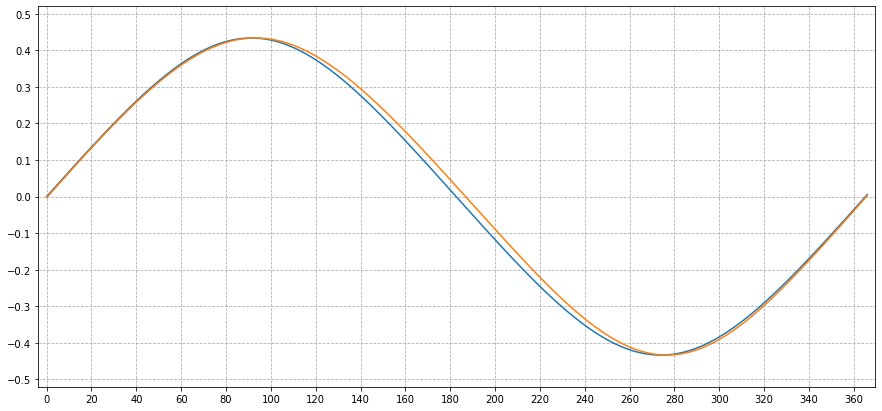

In [129]:
#Declination curve for polar sundial with (unit) cylindrical surface (gnomon at the centre)
x = np.linspace(0, 366, 500)
fig = plt.figure(figsize=(15,7))
ax = fig.gca()
plt.plot(x,np.tan(sundec(x)))
plt.plot(x,np.tan(sundeq(x)))
plt.margins(.01,.1)
#ax.set_xlim([-1,3])
#ax.set_ylim([-1,10])
ax.set_xticks(np.arange(0, 365, 20))
ax.set_yticks(np.arange(-0.5, 0.55, .1))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.legend(loc=2)
#plt.savefig('sundecflat.pdf',bbox_inches='tight')
plt.show()

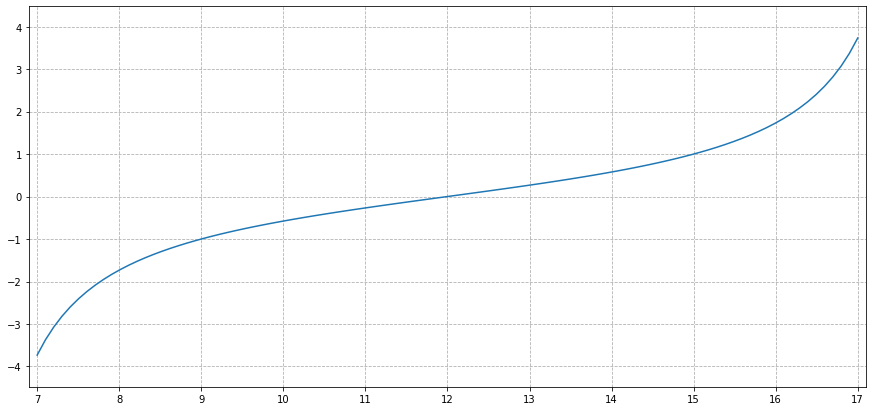

In [42]:
#Hour curve for polar sundial with flat surface (gnomon at unit distance)
x = np.linspace(7, 17, 100)
fig = plt.figure(figsize=(15,7))
ax = fig.gca()
plt.plot(x,np.tan((x-12)*math.pi/12))
plt.margins(.01,.1)
#ax.set_xlim([-1,3])
#ax.set_ylim([-1,10])
ax.set_xticks(np.arange(7, 17.1, 1))
#ax.set_yticks(np.arange(-0.4, 0.5, .1))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.legend(loc=2)
#plt.savefig('sunhourflat.pdf',bbox_inches='tight')
plt.show()

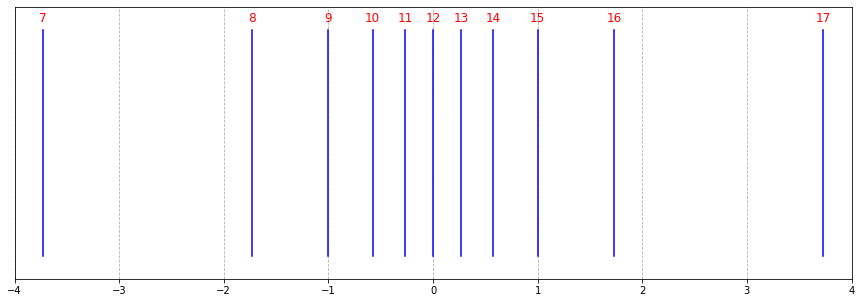

In [77]:
#Hour marks for polar sundial with flat surface (gnomon at unit distance)
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
d = .05
for i in range(7,18):
    x = np.tan((i-12)*math.pi/12)
    plt.plot([x,x],[0,1],'b')
    plt.text(x, 1+d, i, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')
plt.margins(.01,.1)
#ax.set_xlim([-1,3])
ax.set_ylim([-0.1,1.1])
ax.set_xticks(np.arange(-4, 4.1, 1))
#ax.set_yticks(np.arange(-0.4, 0.5, .1))
ax.set_yticks([])
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.legend(loc=2)
#plt.savefig('sunhourflat.pdf',bbox_inches='tight')
plt.show()

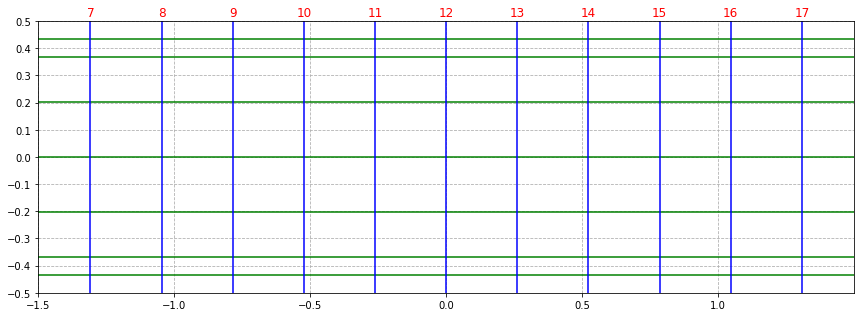

In [143]:
#Seasonal and hourly marks for polar sundial with (unit) cylindrical surface (gnomon at the centre)
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
d = .03
for i in range(-3,4):
    y = np.tan(sundec(i*365.5/12))
    plt.plot([-1.5,1.5],[y,y],'g')
for i in range(7,18):
    x = (i-12)*math.pi/12
    plt.plot([x,x],[-.5,.5],'b')
    plt.text(x, .5+d, i, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')
plt.margins(.01,.1)
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-0.5,0.5])
ax.set_xticks(np.arange(-1.5, 1.1, .5))
ax.set_yticks(np.arange(-0.5, 0.51, .1))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
ax.set_aspect(1)
#plt.legend(loc=2)
#plt.savefig('sunhourflat.pdf',bbox_inches='tight')
plt.show()

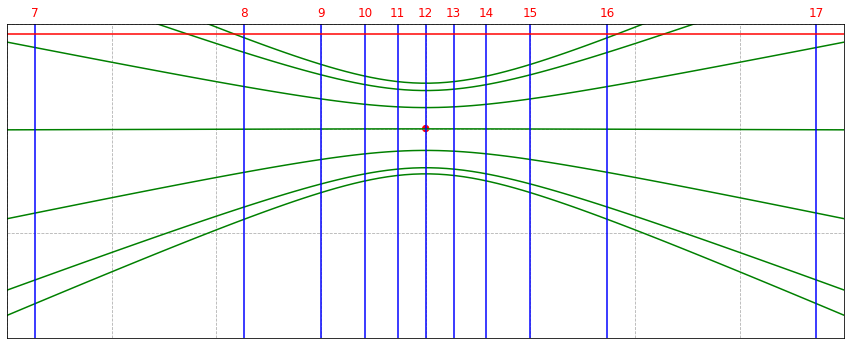

In [130]:
#Seasonal and hourly marks for polar sundial with flat surface (gnomon at unit distance)
def sdpolar(x):
    return np.sqrt(x*x+1)*np.tan(delta)
def sspolar(x):
    return cta
    
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
d = .1
lat = 47.8864
cta = 1/np.tan(lat*math.pi/180)
x = np.linspace(-4, 4, 100)
for i in range(-3,4):
    delta = sundeq(i*365.5/12)
    plt.plot(x,sdpolar(x),'g')
for i in range(7,18):
    x = np.tan((i-12)*math.pi/12)
    plt.plot([x,x],[-2,1],'b')
    plt.text(x, 1+d, i, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')
plt.plot([-4,4],[cta,cta],'r')
cc = plt.Circle((0,0),.03,color='r')
ax.add_artist(cc)

plt.margins(.01,.1)
ax.set_xlim([-2,2])
ax.set_ylim([-2,1])
ax.set_xticks(np.arange(-4, 4.1, 1))
ax.set_yticks(np.arange(-2, 1.1, 1))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
ax.set_aspect(1)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_ticks_position('none')
#plt.legend(loc=2)
#plt.savefig('polarsundial.pdf',bbox_inches='tight')
plt.show()

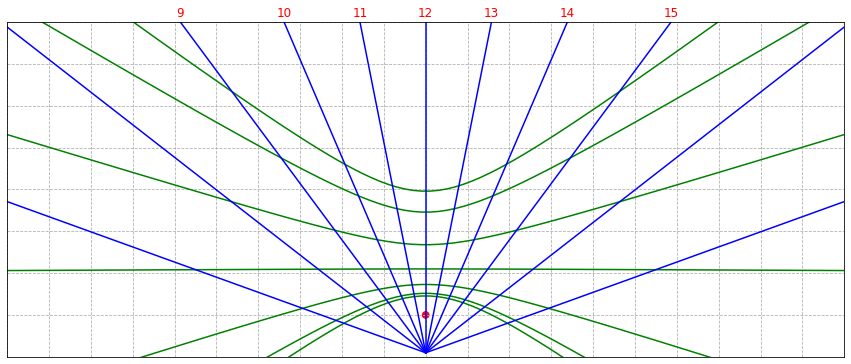

In [131]:
#Seasonal and hourly marks for horizontal sundial (gnomon at unit height at the origin)
def sdhoriz(x):
    td=np.tan(delta)
    t2d=td*td
    a = 1-t2a*t2d
    b = ta*(t2d+1)
    c = x*x*sc2a*t2d+t2d-t2a
    d = a*c+b*b
    v = (np.sqrt(d)*np.sign(delta)+b)/a
    return v

fig = plt.figure(figsize=(15,9))
ax = fig.gca()
d = .03
xm = 10
ym = 7
lat = 47.8864
h = np.tan(lat*math.pi/180)
h0 = 1/h
h1 = ym
ua = (h0+h1)*np.sin(lat*math.pi/180)

ta=h
t2a=ta*ta
ca=np.cos(lat*math.pi/180)
sc2a=1/(ca*ca)


x = np.linspace(-xm, xm, 100)
for i in range(-3,4):
    delta = sundeq(i*365.5/12)
    plt.plot(x,sdhoriz(x),'g')

for i in range(7,18):
    x = ua*np.tan((i-12)*math.pi/12)
    plt.plot([0,x],[-h0,h1],'b')
cc = plt.Circle((0,0),.08,color='r')
ax.add_artist(cc)

for i in range(9,16):
    x = ua*np.tan((i-12)*math.pi/12)
    plt.text(x, h1+.2, i, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')


plt.margins(.01,.1)
ax.set_xlim([-xm,xm])
ax.set_ylim([-1,ym])
ax.set_xticks(np.arange(-xm, xm+.1, 1))
ax.set_yticks(np.arange(-1, ym+.1, 1))
plt.rcParams['grid.linestyle'] = "--"
ax.set_aspect(1)
plt.grid()
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_ticks_position('none')
#plt.legend(loc=2)
#plt.savefig('horizontalsundial.pdf',bbox_inches='tight')
plt.show()

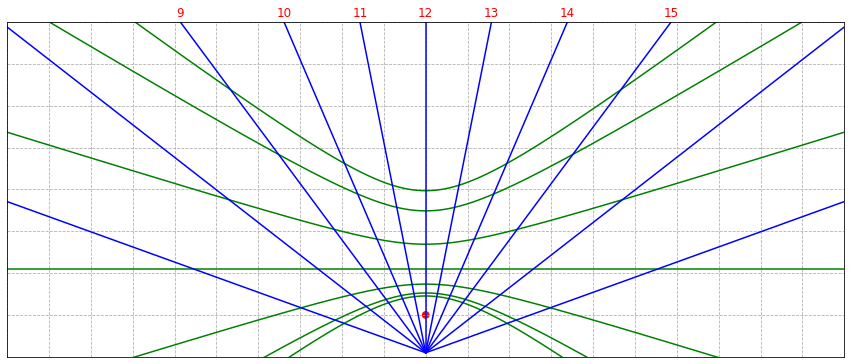

In [290]:
#Seasonal and hourly marks for horizontal sundial (gnomon at unit height at the origin)
def sdhx(t):
    td=np.tan(delta)
    return np.sin(t)/(csa*np.cos(t)-sna*td)
def sdhv(t):
    td=np.tan(delta)
    return (sna*np.cos(t)+csa*td)/(csa*np.cos(t)-sna*td)

fig = plt.figure(figsize=(15,9))
ax = fig.gca()
d = .03
xm = 10
ym = 7
tm = 4*math.pi/12
lat = 47.8864
h = np.tan(lat*math.pi/180)
h0 = 1/h
h1 = ym
ua = (h0+h1)*np.sin(lat*math.pi/180)

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)


for i in range(-3,4):
    delta = sundec(i*365.5/12)
    tm = np.arccos(h*np.tan(delta))-.5*math.pi/12
    t = np.linspace(-tm, tm, 100)
    plt.plot(sdhx(t),sdhv(t),'g')

for i in range(7,18):
    x = ua*np.tan((i-12)*math.pi/12)
    plt.plot([0,x],[-h0,h1],'b')
cc = plt.Circle((0,0),.08,color='r')
ax.add_artist(cc)

for i in range(9,16):
    x = ua*np.tan((i-12)*math.pi/12)
    plt.text(x, h1+.2, i, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')


plt.margins(.01,.1)
ax.set_xlim([-xm,xm])
ax.set_ylim([-1,ym])
ax.set_xticks(np.arange(-xm, xm+.1, 1))
ax.set_yticks(np.arange(-1, ym+.1, 1))
plt.rcParams['grid.linestyle'] = "--"
ax.set_aspect(1)
plt.grid()
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_ticks_position('none')
#plt.legend(loc=2)
#plt.savefig('horizontalsundial1.pdf',bbox_inches='tight')
plt.show()

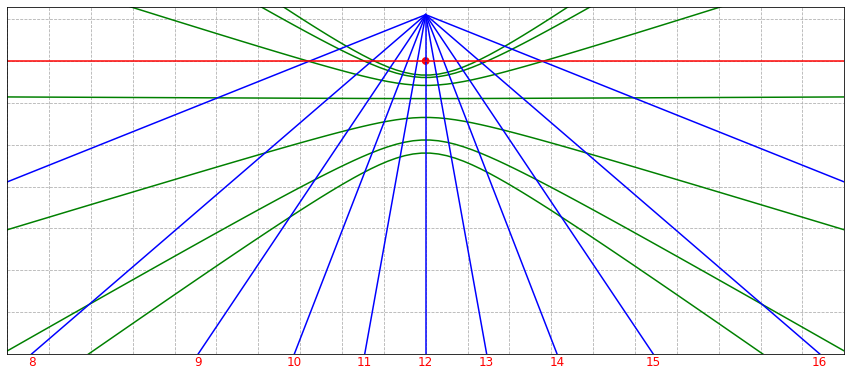

In [132]:
#Seasonal and hourly marks for south facing vertical sundial (gnomon at unit distance at the origin)
def sdvert(x):
    td=np.tan(delta)
    t2d=td*td
    a = 1-t2a*t2d
    b = ta*(t2d+1)
    c = x*x*sc2a*t2d+t2d-t2a
    d = a*c+b*b
    v = (np.sqrt(d)*np.sign(delta)+b)/a
    return v

fig = plt.figure(figsize=(15,9))
ax = fig.gca()
d = .03
xm = 10
ym = 7
lat = 47.8864
colat = 90-lat
h = np.tan(colat*math.pi/180)
h0 = 1/h
h1 = ym
ua = (h0+h1)*np.sin(colat*math.pi/180)

ta=h
t2a=ta*ta
ca=np.cos(lat*math.pi/180)
sc2a=1/(ca*ca)


x = np.linspace(-xm, xm, 100)
for i in range(-3,4):
    delta = sundeq(i*365.5/12)
    plt.plot(x,-sdvert(x),'g')

for i in range(7,18):
    x = ua*np.tan((i-12)*math.pi/12)
    plt.plot([0,x],[h0,-h1],'b')

plt.plot([-xm,xm],[0,0],'r')

cc = plt.Circle((0,0),.08,color='r')
ax.add_artist(cc)

for i in range(8,17):
    x = ua*np.tan((i-12)*math.pi/12)
    plt.text(x, -h1-.2, i, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')


plt.margins(.01,.1)
ax.set_xlim([-xm,xm])
ax.set_ylim([-ym,1.3])
ax.set_xticks(np.arange(-xm, xm+.1, 1))
ax.set_yticks(np.arange(-ym, 1.3, 1))
plt.rcParams['grid.linestyle'] = "--"
ax.set_aspect(1)
plt.grid()
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_ticks_position('none')
#plt.legend(loc=2)
#plt.savefig('verticalsundial.pdf',bbox_inches='tight')
plt.show()

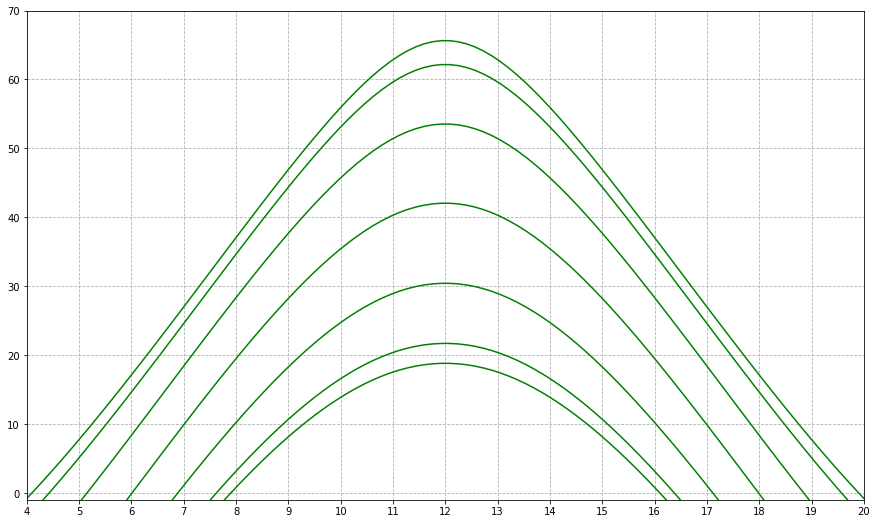

In [133]:
#Solar altitude
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(d):
    t=np.arccos(tna*np.tan(d))
    return a2h(t)
def solalt(tt):
    td=np.tan(delta)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solaz(tt):
    td=np.tan(delta)
    t=h2a(tt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)
def solaltd(d):
    td=np.tan(d)
    t=h2a(ttt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solazd(d):
    td=np.tan(d)
    t=h2a(ttt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)

d = .03
xm = 10
ym = 70
t1=4
t2=20

lat = 47.780622
lon = 106.644736

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

fig = plt.figure(figsize=(15,9))
ax = fig.gca()

t = np.linspace(t1, t2, 100)

for i in range(-3,4):
    delta = -sundeq(i*365.24/12)
    plt.plot(t,solalt(t),'g')

plt.margins(.01,.1)
ax.set_xlim([t1,t2])
ax.set_ylim([-1,ym])
ax.set_xticks(np.arange(t1, t2+.1, 1))
ax.set_yticks(np.arange(0, ym+.1, 10))
plt.rcParams['grid.linestyle'] = "--"
#ax.set_aspect(1)
plt.grid()
#plt.legend(loc=2)
#plt.savefig('solaraltitude.pdf',bbox_inches='tight')
plt.show()


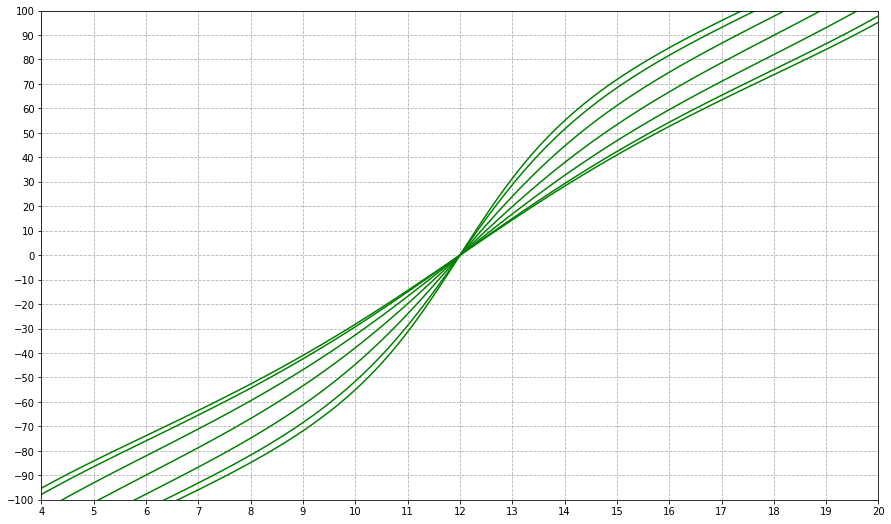

In [134]:
#Solar azimuth
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(d):
    t=np.arccos(tna*np.tan(d))
    return a2h(t)
def solalt(tt):
    td=np.tan(delta)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solaz(tt):
    td=np.tan(delta)
    t=h2a(tt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)

d = .03
xm = 10
ym = 100
t1=4
t2=20

lat = 47.780622
lon = 106.644736

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

fig = plt.figure(figsize=(15,9))
ax = fig.gca()

t = np.linspace(t1, t2, 100)

for i in range(-3,4):
    delta = -sundeq(i*365.24/12)
    plt.plot(t,solaz(t),'g')

plt.margins(.01,.1)
ax.set_xlim([t1,t2])
ax.set_ylim([-1,ym])
ax.set_xticks(np.arange(t1, t2+.1, 1))
ax.set_yticks(np.arange(-ym, ym+.1, 10))
plt.rcParams['grid.linestyle'] = "--"
#ax.set_aspect(1)
plt.grid()
#plt.legend(loc=2)
#plt.savefig('solarazimuth.pdf',bbox_inches='tight')
plt.show()



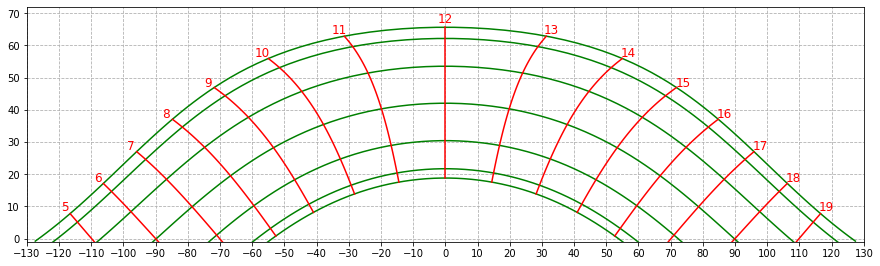

In [135]:
#Solar altitude-azimuth curve
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(d):
    t=np.arccos(tna*np.tan(d))
    return a2h(t)
def solalt(tt):
    td=np.tan(delta)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solaz(tt):
    td=np.tan(delta)
    t=h2a(tt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)
def solaltd(d):
    td=np.tan(d)
    t=h2a(ttt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solazd(d):
    td=np.tan(d)
    t=h2a(ttt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)

d = .03
xm = 130
ym = 72
t1=4
t2=20

lat = 47.780622
lon = 106.644736

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

fig = plt.figure(figsize=(15,7))
ax = fig.gca()

t = np.linspace(t1, t2, 100)

for i in range(-3,4):
    delta = -sundeq(i*365.24/12)
    plt.plot(solaz(t),solalt(t),'g')

k=2.5
for ttt in range(5,20):
    d = np.linspace(sundeq(-3*365.5/12),sundeq(3*365.5/12),100)
    plt.plot(solazd(d),solaltd(d),'r')
    d = -sundeq(2*365.24/12)
    dx = solazd(d)
    dy = solaltd(d)
    d = -sundeq(3*365.24/12)
    x = solazd(d)
    y = solaltd(d)
    dx = x-dx
    dy = y-dy
    d = np.sqrt(dx*dx+dy*dy)
    dx = dx/d
    dy = dy/d
    plt.text(x+k*dx,y+k*dy, ttt, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')
    
plt.margins(.01,.1)
ax.set_xlim([t1,t2])
ax.set_ylim([-1,ym])
ax.set_xticks(np.arange(-xm, xm+.1, 10))
ax.set_yticks(np.arange(0, ym+.1, 10))
plt.rcParams['grid.linestyle'] = "--"
ax.set_aspect(1)
plt.grid()
#plt.legend(loc=2)
#plt.savefig('azalt.pdf',bbox_inches='tight')
plt.show()




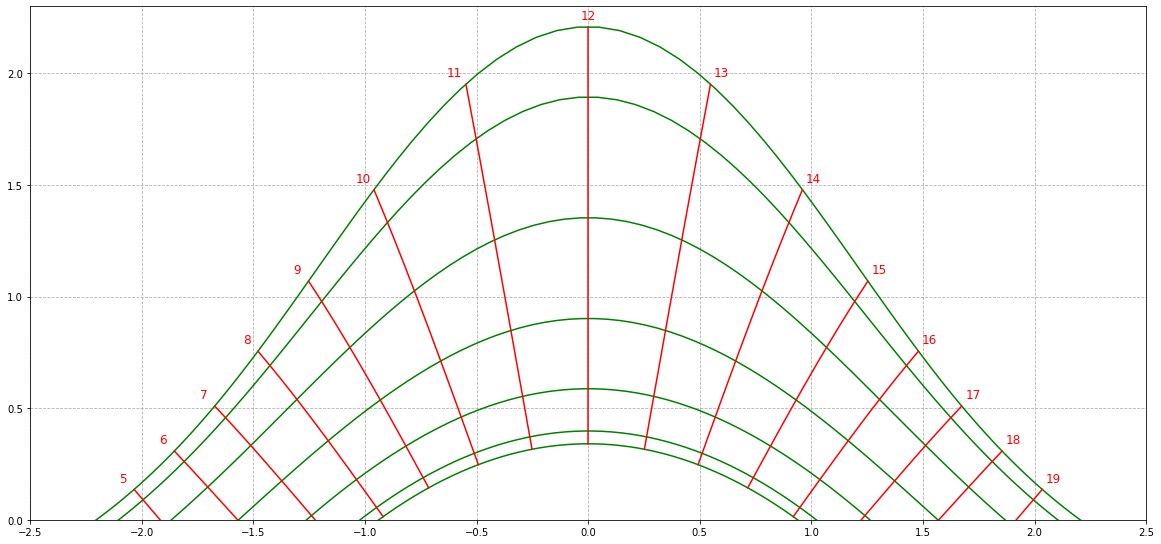

In [37]:
#Solar height-azimuth curve
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(d):
    t=np.arccos(tna*np.tan(d))
    return a2h(t)
def solalttg(tt):
    td=np.tan(delta)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.tan(alt)
def solaz(tt):
    td=np.tan(delta)
    t=h2a(tt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return az
def solalttgd(d):
    td=np.tan(d)
    t=h2a(ttt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.tan(alt)
def solazd(d):
    td=np.tan(d)
    t=h2a(ttt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return az

d = .03
xm = 2.5
ym = 2.3
t1=4
t2=20

lat = 47.780622
lon = 106.644736

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

fig = plt.figure(figsize=(20,15))
ax = fig.gca()

t = np.linspace(t1, t2, 100)

for i in range(-3,4):
    delta = -sundeq(i*365.24/12)
    plt.plot(solaz(t),solalttg(t),'g')

kx=.05
ky=.05
for ttt in range(5,20):
    d = np.linspace(sundeq(-3*365.5/12),sundeq(3*365.5/12),200)
    plt.plot(solazd(d),solalttgd(d),'r')
    d = -sundeq(2*365.24/12)
    dx = solazd(d)
    dy = solalttgd(d)
    d = -sundeq(3*365.24/12)
    x = solazd(d)
    y = solalttgd(d)
    dx = x-dx
    dy = y-dy
    d = np.sqrt(dx*dx+dy*dy)
    dx = np.sign(dx)
    plt.text(x+kx*dx,y+ky, ttt, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')
    
plt.margins(.01,.1)
#ax.set_xlim([t1,t2])
ax.set_ylim([0,ym])
ax.set_xticks(np.arange(-xm, xm+.1, .5))
ax.set_yticks(np.arange(0, ym+.1, .5))
plt.rcParams['grid.linestyle'] = "--"
ax.set_aspect(1)
plt.grid()
#plt.legend(loc=2)
#plt.savefig('azalttg.pdf',bbox_inches='tight')
plt.show()

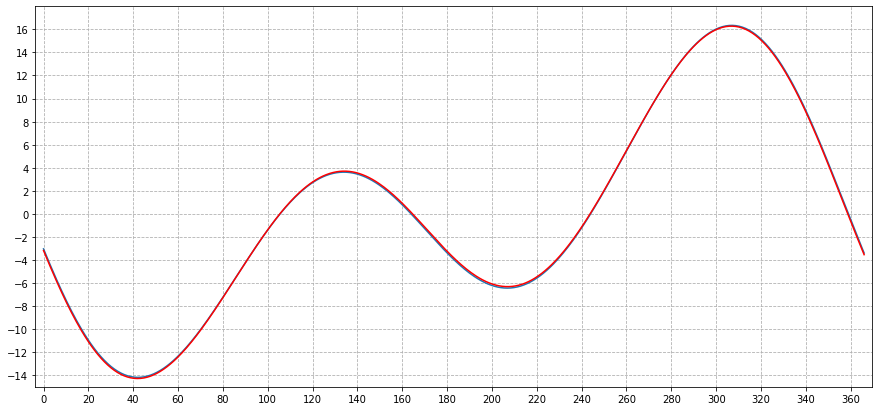

In [112]:
#Equation of time
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi

x = np.linspace(0, 366, 500)
fig = plt.figure(figsize=(15,7))
ax = fig.gca()
plt.plot(x,60*eqot1(x))
plt.plot(x,60*eqot2(x),'r')
plt.margins(.01,.1)
#ax.set_xlim([-1,3])
ax.set_ylim([-15,18])
ax.set_xticks(np.arange(0, 365, 20))
ax.set_yticks(np.arange(-14, 16.1, 2))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.legend(loc=2)
#plt.savefig('scaphe.pdf',bbox_inches='tight')
plt.show()

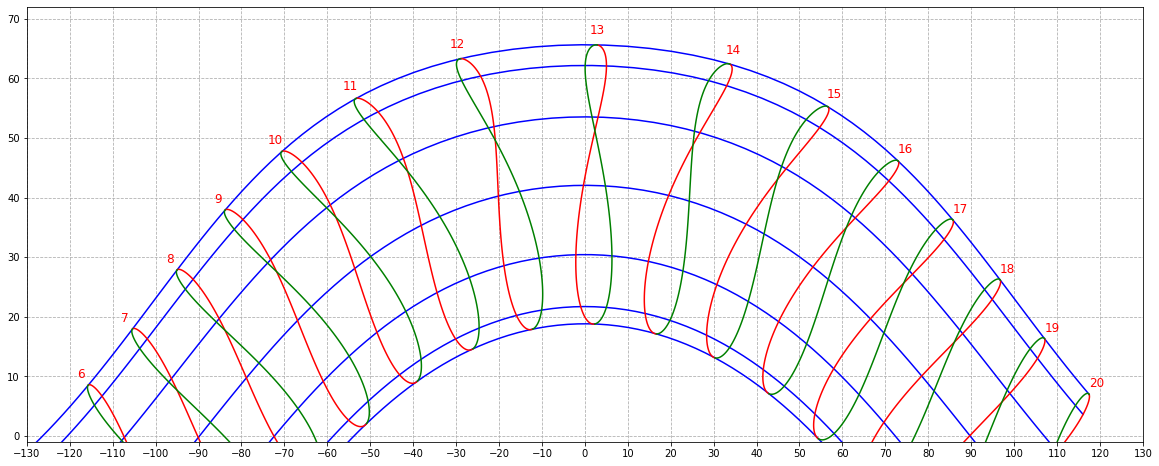

In [9]:
#Solar altitude-azimuth curve with equation of time accounted for
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(d):
    t=np.arccos(tna*np.tan(d))
    return a2h(t)
def solalt(tt):
    d=-sundeq(ddd)
    td=np.tan(d)
    t=h2a(tt+eqot(ddd)+lon/15-timezone-dst)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solaz(tt):
    d=-sundeq(ddd)
    td=np.tan(d)
    t=h2a(tt+eqot(ddd)+lon/15-timezone-dst)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)
def solaltd(day):
    d=-sundeq(day)
    td=np.tan(d)
    tt=ttt+eqot(day)+lon/15-timezone-dst
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solazd(day):
    d=-sundeq(day)
    td=np.tan(d)
    tt=ttt+eqot(day)+lon/15-timezone-dst
    t=h2a(tt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)

xm = 130
ym = 72
t1=4
t2=20

lat = 47.780622
lon = 106.644736
timezone = 8
dst = 0

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

fig = plt.figure(figsize=(20,8))
ax = fig.gca()

t = np.linspace(t1, t2, 100)

for i in range(-3,4):
    ddd=i*365.24/12
    plt.plot(solaz(t),solalt(t),'b')

k=2.5
for ttt in range(6,21):
    d = np.linspace(-3*365.24/12,3*365.24/12,100)
    plt.plot(solazd(d),solaltd(d),'r')
    d = np.linspace(3*365.24/12,9*365.24/12,100)
    plt.plot(solazd(d),solaltd(d),'g')
    d = -3*365.24/12
    dx = solazd(d)
    dy = solaltd(d)
    d = 3*365.24/12
    x = solazd(d)
    y = solaltd(d)
    dx = x-dx
    dy = y-dy
    d = np.sqrt(dx*dx+dy*dy)
    dx = dx/d
    dy = dy/d
    plt.text(x+k*dx,y+k*dy, ttt, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')
    
plt.margins(.01,.1)
ax.set_xlim([t1,t2])
ax.set_ylim([-1,ym])
ax.set_xticks(np.arange(-xm, xm+.1, 10))
ax.set_yticks(np.arange(0, ym+.1, 10))
plt.rcParams['grid.linestyle'] = "--"
#ax.set_aspect(1)
plt.grid()
#plt.legend(loc=2)
#plt.savefig('azalteqot.pdf',bbox_inches='tight')
plt.show()

In [14]:
60-(eqot(90)+lon/15+1-timezone)*60

54.492702130592434

In [15]:
60-(eqot(-90)+lon/15+1-timezone)*60

51.07666859966933

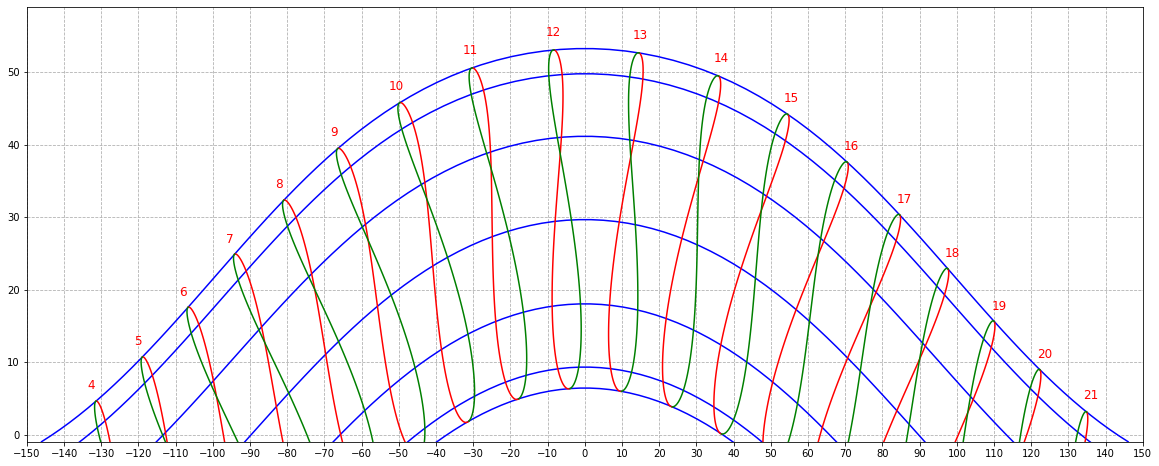

In [7]:
#Solar altitude-azimuth curve with equation of time accounted for
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(d):
    t=np.arccos(tna*np.tan(d))
    return a2h(t)
def solalt(tt):
    td=np.tan(delta)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solaz(tt):
    td=np.tan(delta)
    t=h2a(tt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)
def solaltd(day):
    d=-sundeq(day)
    td=np.tan(d)
    tt=ttt+eqot(day)+lon/15-timezone-dst
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solazd(day):
    d=-sundeq(day)
    td=np.tan(d)
    tt=ttt+eqot(day)+lon/15-timezone-dst
    t=h2a(tt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)

xm = 150
ym = 59
t1=2.5
t2=21.5

#Moscow
#lat = 55.755833
#lon = 37.617222
#timezone = 3
#dst = 0

#Helsinki
lat = 60.170833
lon = 24.9375
timezone = 2
dst = 0

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

fig = plt.figure(figsize=(20,8))
ax = fig.gca()

t = np.linspace(t1, t2, 100)

for i in range(-3,4):
    delta = -sundeq(i*365.24/12)
    plt.plot(solaz(t),solalt(t),'b')

k=2.5
for ttt in range(4,22):
    d = np.linspace(-3*365.24/12,3*365.24/12,100)
    plt.plot(solazd(d),solaltd(d),'r')
    d = np.linspace(3*365.24/12,9*365.24/12,100)
    plt.plot(solazd(d),solaltd(d),'g')
    d = -3*365.24/12
    dx = solazd(d)
    dy = solaltd(d)
    d = 3*365.24/12
    x = solazd(d)
    y = solaltd(d)
    dx = x-dx
    dy = y-dy
    d = np.sqrt(dx*dx+dy*dy)
    dx = dx/d
    dy = dy/d
    plt.text(x+k*dx,y+k*dy, ttt, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')
    
plt.margins(.01,.1)
ax.set_xlim([t1,t2])
ax.set_ylim([-1,ym])
ax.set_xticks(np.arange(-xm, xm+.1, 10))
ax.set_yticks(np.arange(0, ym+.1, 10))
plt.rcParams['grid.linestyle'] = "--"
#ax.set_aspect(1)
plt.grid()
#plt.legend(loc=2)
#plt.savefig('azalteqot.pdf',bbox_inches='tight')
plt.show()

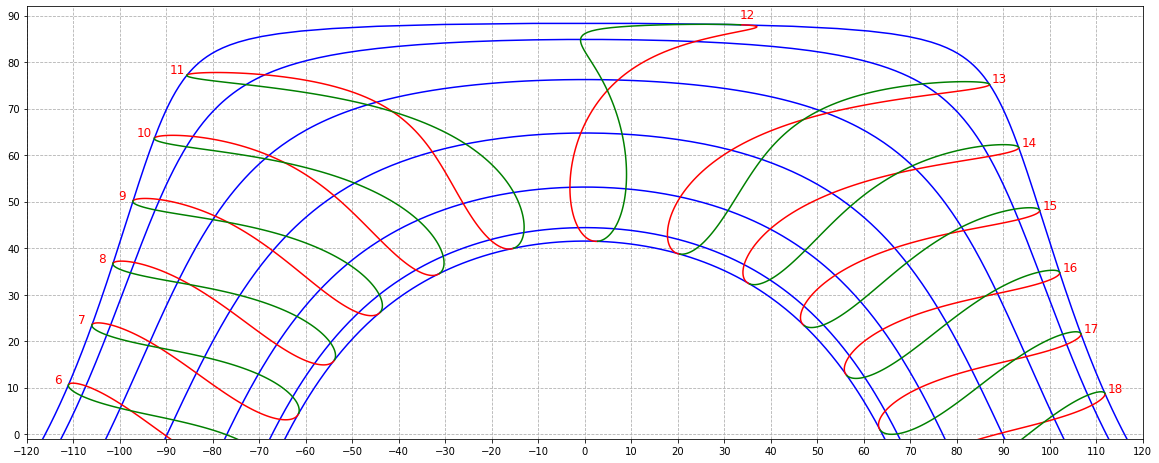

In [9]:
#Solar altitude-azimuth curve with equation of time accounted for
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(d):
    t=np.arccos(tna*np.tan(d))
    return a2h(t)
def solalt(tt):
    td=np.tan(delta)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solaz(tt):
    td=np.tan(delta)
    t=h2a(tt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)
def solaltd(day):
    d=-sundeq(day)
    td=np.tan(d)
    tt=ttt+eqot(day)+lon/15-timezone-dst
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solazd(day):
    d=-sundeq(day)
    td=np.tan(d)
    tt=ttt+eqot(day)+lon/15-timezone-dst
    t=h2a(tt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)

xm = 120
ym = 92
t1=5
t2=19

#Moscow
#lat = 55.755833
#lon = 37.617222
#timezone = 3
#dst = 0

#Helsinki
#lat = 60.170833
#lon = 24.9375
#timezone = 2
#dst = 0

#Taipei
lat = 25.066667
lon = 121.516667
timezone = 8
dst = 0


sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

fig = plt.figure(figsize=(20,8))
ax = fig.gca()

t = np.linspace(t1, t2, 300)

for i in range(-3,4):
    delta = -sundeq(i*365.24/12)
    plt.plot(solaz(t),solalt(t),'b')

k=2.5
for ttt in range(6,19):
    d = np.linspace(-3*365.24/12,3*365.24/12,100)
    plt.plot(solazd(d),solaltd(d),'r')
    d = np.linspace(3*365.24/12,9*365.24/12,100)
    plt.plot(solazd(d),solaltd(d),'g')
    d = -3*365.24/12
    dx = solazd(d)
    dy = solaltd(d)
    d = 3*365.24/12
    x = solazd(d)
    y = solaltd(d)
    dx = x-dx
    dy = y-dy
    d = np.sqrt(dx*dx+dy*dy)
    dx = dx/d
    dy = dy/d
    plt.text(x+k*dx,y+k*dy, ttt, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')
    
plt.margins(.01,.1)
ax.set_xlim([t1,t2])
ax.set_ylim([-1,ym])
ax.set_xticks(np.arange(-xm, xm+.1, 10))
ax.set_yticks(np.arange(0, ym+.1, 10))
plt.rcParams['grid.linestyle'] = "--"
ax.set_aspect(1)
plt.grid()
#plt.legend(loc=2)
#plt.savefig('azalteqot.pdf',bbox_inches='tight')
plt.show()

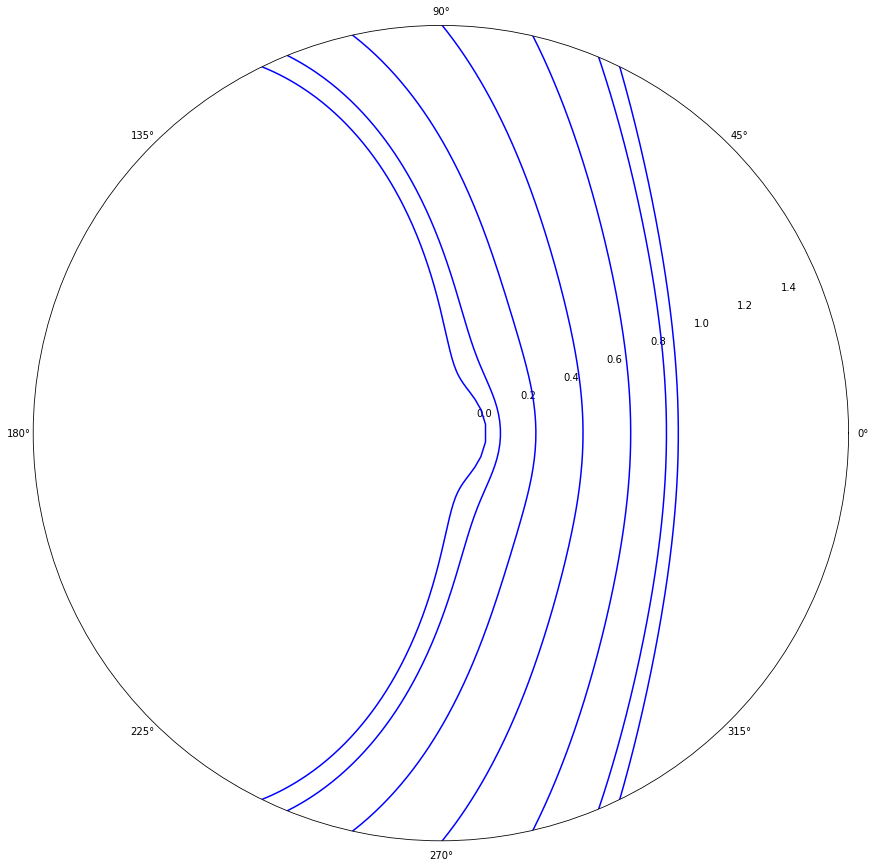

In [10]:
#Solar altitude-azimuth curve with equation of time accounted for
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(d):
    t=np.arccos(tna*np.tan(d))
    return a2h(t)
def solalt(tt):
    td=np.tan(delta)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solaz(tt):
    td=np.tan(delta)
    t=h2a(tt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)
def solaltd(day):
    d=-sundeq(day)
    td=np.tan(d)
    tt=ttt+eqot(day)+lon/15-timezone-dst
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return alt
def solazd(day):
    d=-sundeq(day)
    td=np.tan(d)
    tt=ttt+eqot(day)+lon/15-timezone-dst
    t=h2a(tt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return az

xm = 120
ym = 92
t1=5
t2=19

#Moscow
#lat = 55.755833
#lon = 37.617222
#timezone = 3
#dst = 0

#Helsinki
#lat = 60.170833
#lon = 24.9375
#timezone = 2
#dst = 0

#Taipei
lat = 25.066667
lon = 121.516667
timezone = 8
dst = 0


sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='polar')

t = np.linspace(t1, t2, 300)

for i in range(-3,4):
    delta = -sundeq(i*365.24/12)
    plt.polar(math.pi/180*solaz(t),math.pi/2-math.pi/180*solalt(t),'b')

k=2.5
for ttt in range(6,19):
    d = np.linspace(-3*365.24/12,3*365.24/12,100)
#    plt.polar(solazd(d),solaltd(d),'r')
    d = np.linspace(3*365.24/12,9*365.24/12,100)
#    plt.polar(solazd(d),solaltd(d),'g')
    d = -3*365.24/12
    dx = solazd(d)
    dy = solaltd(d)
    d = 3*365.24/12
    x = solazd(d)
    y = solaltd(d)
    dx = x-dx
    dy = y-dy
    d = np.sqrt(dx*dx+dy*dy)
    dx = dx/d
    dy = dy/d
#    plt.text(x+k*dx,y+k*dy, ttt, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')
    
plt.margins(.01,.1)
#ax.set_xlim([t1,t2])
ax.set_rmax(math.pi/2)
#ax.set_xticks(np.arange(-xm, xm+.1, 10))
#ax.set_yticks(np.arange(0, ym+.1, 10))
plt.rcParams['grid.linestyle'] = "--"
#ax.set_aspect(1)
plt.grid()
#plt.legend(loc=2)
#plt.savefig('azalteqot.pdf',bbox_inches='tight')
plt.show()

In [5]:
#Solar altitude-azimuth curve
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(d):
    t=np.arccos(tna*np.tan(d))
    return a2h(t)
def solalt(tt):
    td=np.tan(delta)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solaz(tt):
    td=np.tan(delta)
    t=h2a(tt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)
def solaltd(d):
    td=np.tan(d)
    t=h2a(ttt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solazd(d):
    td=np.tan(d)
    t=h2a(ttt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)

d = .03
xm = 130
ym = 72
t1=4
t2=20

lat = 47.780622
lon = 106.644736

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

t = np.linspace(t1, t2, 100)

for t in range(t1,t2):
    print('{0:7.2f}'.format(t),end='')
print()

for i in range(-3,4):
    delta = -sundeq(i*365.24/12)
    for t in range(t1,t2):
        print('{0:7.2f}'.format(solaz(t)),end='')
    print()
    for t in range(t1,t2):
        print('{0:7.2f}'.format(solalt(t)),end='')
    print()
        

   4.00   5.00   6.00   7.00   8.00   9.00  10.00  11.00  12.00  13.00  14.00  15.00  16.00  17.00  18.00  19.00
 -95.24 -84.13 -73.78 -63.45 -52.64 -40.96 -28.21 -14.42   0.00  14.42  28.21  40.96  52.64  63.45  73.78  84.13
 -37.05 -26.99 -17.11  -7.74   0.81   8.15  13.87  17.54  18.81  17.54  13.87   8.15   0.81  -7.74 -17.11 -26.99
 -97.81 -86.46 -75.88 -65.35 -54.32 -42.37 -29.25 -14.99   0.00  14.99  29.25  42.37  54.32  65.35  75.88  86.46
 -35.05 -24.99 -15.05  -5.55   3.16  10.69  16.58  20.38  21.70  20.38  16.58  10.69   3.16  -5.55 -15.05 -24.99
-104.87 -93.04 -82.01 -71.03 -59.48 -46.80 -32.60 -16.83   0.00  16.83  32.60  46.80  59.48  71.03  82.01  93.04
 -28.70 -18.76  -8.71   1.08  10.22  18.28  24.72  28.94  30.42  28.94  24.72  18.28  10.22   1.08  -8.71 -18.76
-113.04-101.11 -89.89 -78.66 -66.74 -53.37 -37.85 -19.84   0.00  19.84  37.85  53.37  66.74  78.66  89.89 101.11
 -19.77 -10.14  -0.13   9.89  19.50  28.23  35.43  40.31  42.05  40.31  35.43  28.23  19.50   9.

In [11]:
#Solar altitude-azimuth curve with equation of time accounted for
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(d):
    t=np.arccos(tna*np.tan(d))
    return a2h(t)
def solalt(tt):
    d=-sundeq(ddd)
    td=np.tan(d)
    t=h2a(tt+eqot(ddd)+lon/15-timezone-dst)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solaz(tt):
    d=-sundeq(ddd)
    td=np.tan(d)
    t=h2a(tt+eqot(ddd)+lon/15-timezone-dst)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)
def solaltd(day):
    d=-sundeq(day)
    td=np.tan(d)
    tt=ttt+eqot(day)+lon/15-timezone-dst
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solazd(day):
    d=-sundeq(day)
    td=np.tan(d)
    tt=ttt+eqot(day)+lon/15-timezone-dst
    t=h2a(tt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)

xm = 130
ym = 72
t1=4
t2=20

lat = 47.780622
lon = 106.644736
timezone = 8
dst = 0

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

t = np.linspace(t1, t2, 100)

for t in range(t1,t2):
    print('{0:7.2f}'.format(t),end='')
print()

for i in range(-3,4):
    ddd = i*365.24/12
    for t in range(t1,t2):
        print('{0:7.2f}'.format(solaz(t)),end='')
    print()
    for t in range(t1,t2):
        print('{0:7.2f}'.format(solalt(t)),end='')
    print()

   4.00   5.00   6.00   7.00   8.00   9.00  10.00  11.00  12.00  13.00  14.00  15.00  16.00  17.00  18.00  19.00
-105.95 -93.37 -82.45 -72.14 -61.77 -50.84 -39.00 -26.07 -12.15   2.32  16.68  30.31  42.89  54.41  65.12  75.41
 -45.37 -35.45 -25.39 -15.58  -6.31   2.07   9.18  14.61  17.91  18.78  17.11  13.09   7.08  -0.49  -9.19 -18.66
-111.99 -98.58 -87.14 -76.55 -66.03 -55.05 -43.16 -30.12 -15.92  -0.96  14.05  28.38  41.58  53.60  64.67  75.22
 -45.39 -35.68 -25.63 -15.67  -6.13   2.64  10.25  16.27  20.21  21.69  20.54  16.89  11.11   3.67  -4.97 -14.43
-120.31-106.42 -94.43 -83.35 -72.39 -60.94 -48.43 -34.43 -18.83  -2.08  14.81  30.75  45.15  57.99  69.66  80.68
 -39.14 -29.89 -19.99  -9.93  -0.09   9.15  17.37  24.04  28.57  30.40  29.28  25.37  19.17  11.28   2.24  -7.49
-126.65-113.24-101.29 -90.06 -78.84 -66.94 -53.60 -38.12 -20.14  -0.32  19.53  37.59  53.14  66.54  78.48  89.71
 -28.64 -19.91 -10.30  -0.29   9.73  19.35  28.10  35.33  40.25  42.05  40.36  35.53  28.35  19.